In [153]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import sklearn 

# DATA READING 

In [154]:
train=pd.read_csv("train_2v.csv")
test=pd.read_csv("test_2v.csv")

DATA VISUALIZATION

In [183]:
#lets reconize the data patters i mean data balancing both using bar plot and numerically 

In [184]:
train_data["stroke"].value_counts()

stroke
0    28524
1      548
Name: count, dtype: int64

In [185]:
train_data["stroke"].unique()

array([0, 1], dtype=int64)

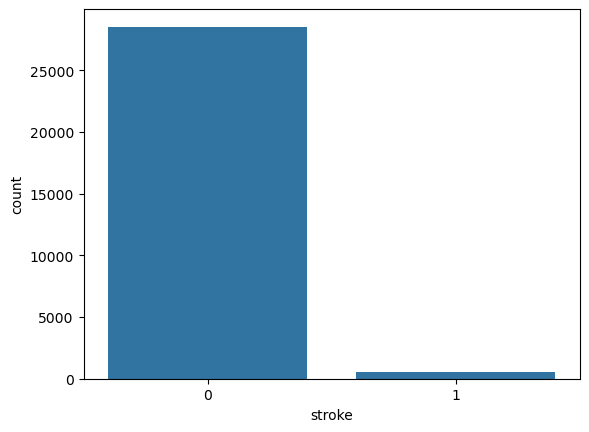

In [186]:
sns.countplot(x=train_data["stroke"])
plt.show()

In [187]:
# lets draw bar plot

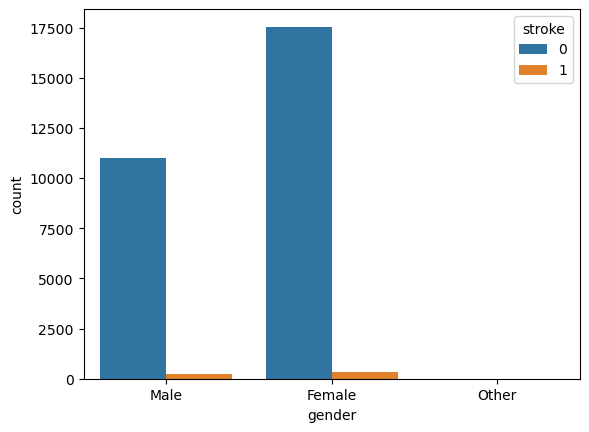

<Figure size 1000x800 with 0 Axes>

In [188]:
sns.countplot(x=train_data["gender"],hue=train_data["stroke"])
plt.figure(figsize=(10,8))
plt.show()

In [189]:
train_data.groupby(["gender"])["stroke"].value_counts()

gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: count, dtype: int64

In [190]:
train_data["smoking_status"].value_counts()

smoking_status
never smoked       15747
formerly smoked     7099
smokes              6226
Name: count, dtype: int64

In [191]:
train_data.groupby(["gender"])["smoking_status"].value_counts()

gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: count, dtype: int64

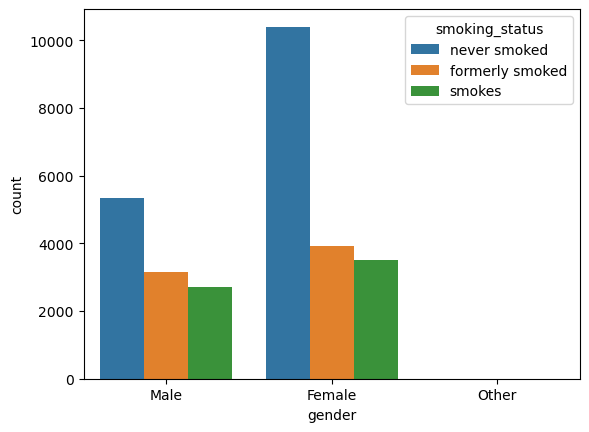

In [192]:
sns.countplot(x=train_data["gender"],hue=train_data["smoking_status"])
plt.show()

Seprating the Categorical Variable and int Variable and after words convert the Categoral Variable  to 
int variable using LABEL ENCODER 

In [193]:
str_data=train_data.select_dtypes(include=["object"])
str_dt=test_data.select_dtypes(include=["object"])

In [194]:
int_data=train_data.select_dtypes(include=["integer","float"])
int_dt=test_data.select_dtypes(include=["integer","float"])

In [195]:
str_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status
1,Male,Yes,Private,Urban,never smoked
3,Female,Yes,Private,Rural,formerly smoked
6,Female,Yes,Private,Urban,formerly smoked
7,Female,Yes,Self-employed,Rural,never smoked
8,Female,Yes,Private,Rural,smokes


In [196]:
print(str_data.shape)
print(str_dt.shape)
print(int_data.shape)
print(int_dt.shape)


(29072, 5)
(12423, 5)
(29072, 7)
(12423, 6)


In [197]:
print(str_data.columns)
print(str_dt.columns)
print(int_data.columns)
print(int_dt.columns)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')


By using LABEL ENCODER  we can transform all the obect or categorical variable into integer 

In [198]:
from sklearn.preprocessing import LabelEncoder


In [199]:
label=LabelEncoder()

In [200]:
features= str_data.apply(label.fit_transform)

In [201]:
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status
1,1,1,2,1,1
3,0,1,2,0,0
6,0,1,2,1,0
7,0,1,3,0,1
8,0,1,2,0,2


In [202]:
features=features.join(int_data)

In [203]:
features.head()


,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [204]:
features.shape

(29072, 12)

In [205]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)

In [206]:
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


Seprate  the Feature  and Target Variable and Store them in X AND Y for Data Modelling

In [208]:
features.shape

(29072, 12)

In [209]:
x_train=features.drop(["stroke"],axis=1)
x_train.shape

(29072, 11)

In [210]:
y_train=features["stroke"]
y_train.head()

1    0
3    0
6    0
7    0
8    0
Name: stroke, dtype: int64

In [211]:
y_train.shape

(29072,)

In [212]:
# lets start MODELLING

In [213]:
# first start by usining train test split 

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train)

In [216]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21804, 11)
(7268, 11)
(21804,)
(7268,)


In [217]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
40691,0,1,2,1,1,64822,79.0,0,0,64.20,30.6
26113,1,1,3,0,1,72243,44.0,0,0,74.90,29.8
26563,0,0,0,1,1,44082,55.0,0,0,109.58,31.2
34339,0,1,2,0,1,12072,57.0,0,0,183.49,44.1
21936,0,1,0,0,1,9334,77.0,0,1,226.82,25.6


In [218]:
y_train.head()

40691    1
26113    0
26563    0
34339    0
21936    0
Name: stroke, dtype: int64

In [219]:
# here comes the algoritm fitting part let firsty use naive byes classification algo based in gaussian nb

In [220]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
30598,0,1,2,0,2,8943,26.0,0,0,88.85,20.2
12919,0,1,0,0,1,61137,74.0,0,0,63.26,26.8
23215,0,1,2,0,2,51654,50.0,0,0,58.32,31.6
17798,0,1,2,1,0,51998,33.0,0,0,117.34,33.8
16679,1,0,2,1,2,17456,24.0,0,0,105.69,30.2


In [221]:
y_test.head()

30598    0
12919    0
23215    0
17798    0
16679    0
Name: stroke, dtype: int64